In [1]:
from matplotlib import pyplot as plt
import cv2
import xml.etree.ElementTree as ET

In [5]:
test_1 = cv2.imread('./data/ua_deteract/Insight-MVT_Annotation_Train/MVI_20065/img00039.jpg')
test_1 = cv2.cvtColor(test_1, cv2.COLOR_BGR2RGB)

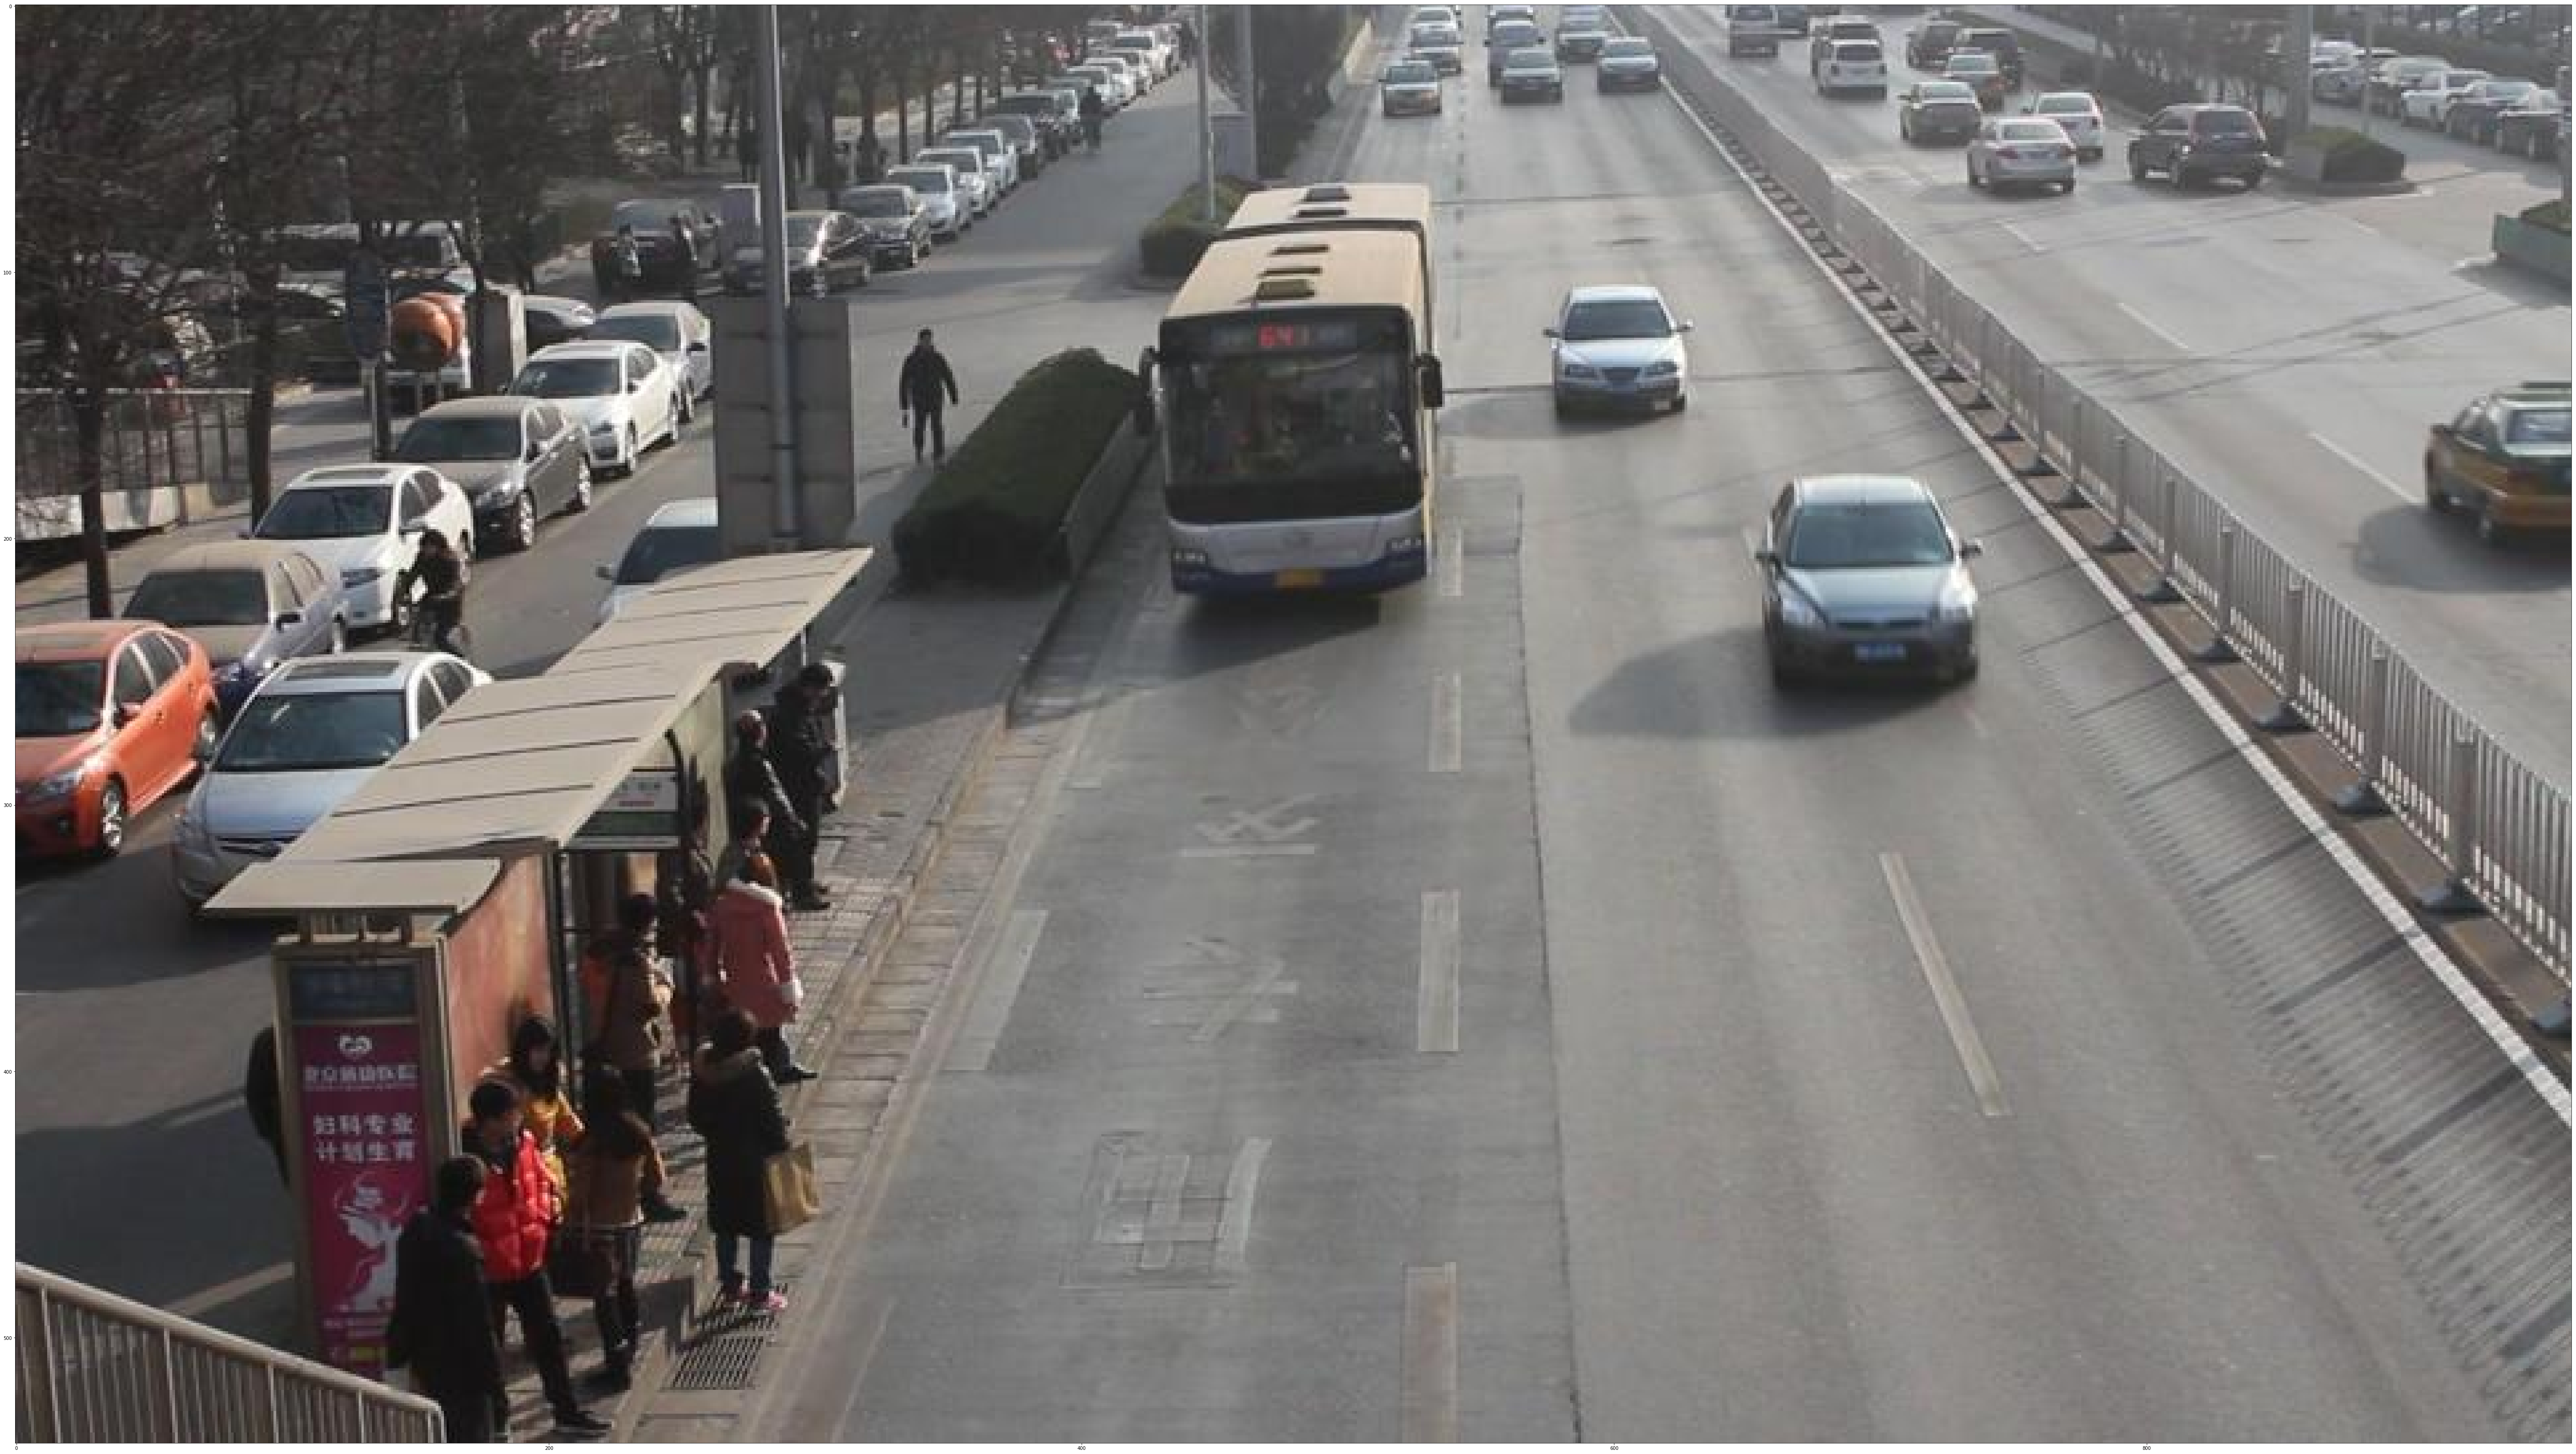

In [7]:
plt.figure(figsize=(100,100))
plt.imshow(test_1)

In [60]:
tree = ET.parse('./data/ua_deteract/DETRAC-Train-Annotations-XML/MVI_20065.xml')

In [71]:
# <box left="597.9" top="65.32" width="33.05" height="25.955"/>
# if 'xmin' in dim.tag:
#     obj['xmin'] = int(round(float(dim.text)))
# if 'ymin' in dim.tag:
#     obj['ymin'] = int(round(float(dim.text)))
# if 'xmax' in dim.tag:
#     obj['xmax'] = int(round(float(dim.text)))
# if 'ymax' in dim.tag:
#     obj['ymax'] = int(round(float(dim.text)))
huex = {
    'car': [],
    'bus': []
}
for elem in tree.findall('frame'):
    if elem.attrib['num'] == '39':
        for target in list(elem.find('target_list')):
            box = target.find('box')
            attribute = target.find('attribute')
            key = attribute.attrib['vehicle_type']
            xmin = int(round(float(box.attrib['left'])))
            ymin = int(round(float(box.attrib['top'])))
            xmax = xmin + int(round(float(box.attrib['width'])))
            ymax = ymin + int(round(float(box.attrib['height'])))
            
            huex[key].append([ymin, xmin, ymax, xmax])

In [72]:
huex

{'car': [[105, 577, 156, 629],
  [177, 654, 257, 738],
  [37, 793, 70, 847],
  [41, 732, 71, 775],
  [31, 757, 58, 785],
  [28, 706, 53, 739],
  [139, 904, 202, 961]],
 'bus': [[67, 429, 222, 532]]}

In [73]:
print(test_1.shape)

(540, 960, 3)


In [57]:
from lib.helpers import draw_box_label

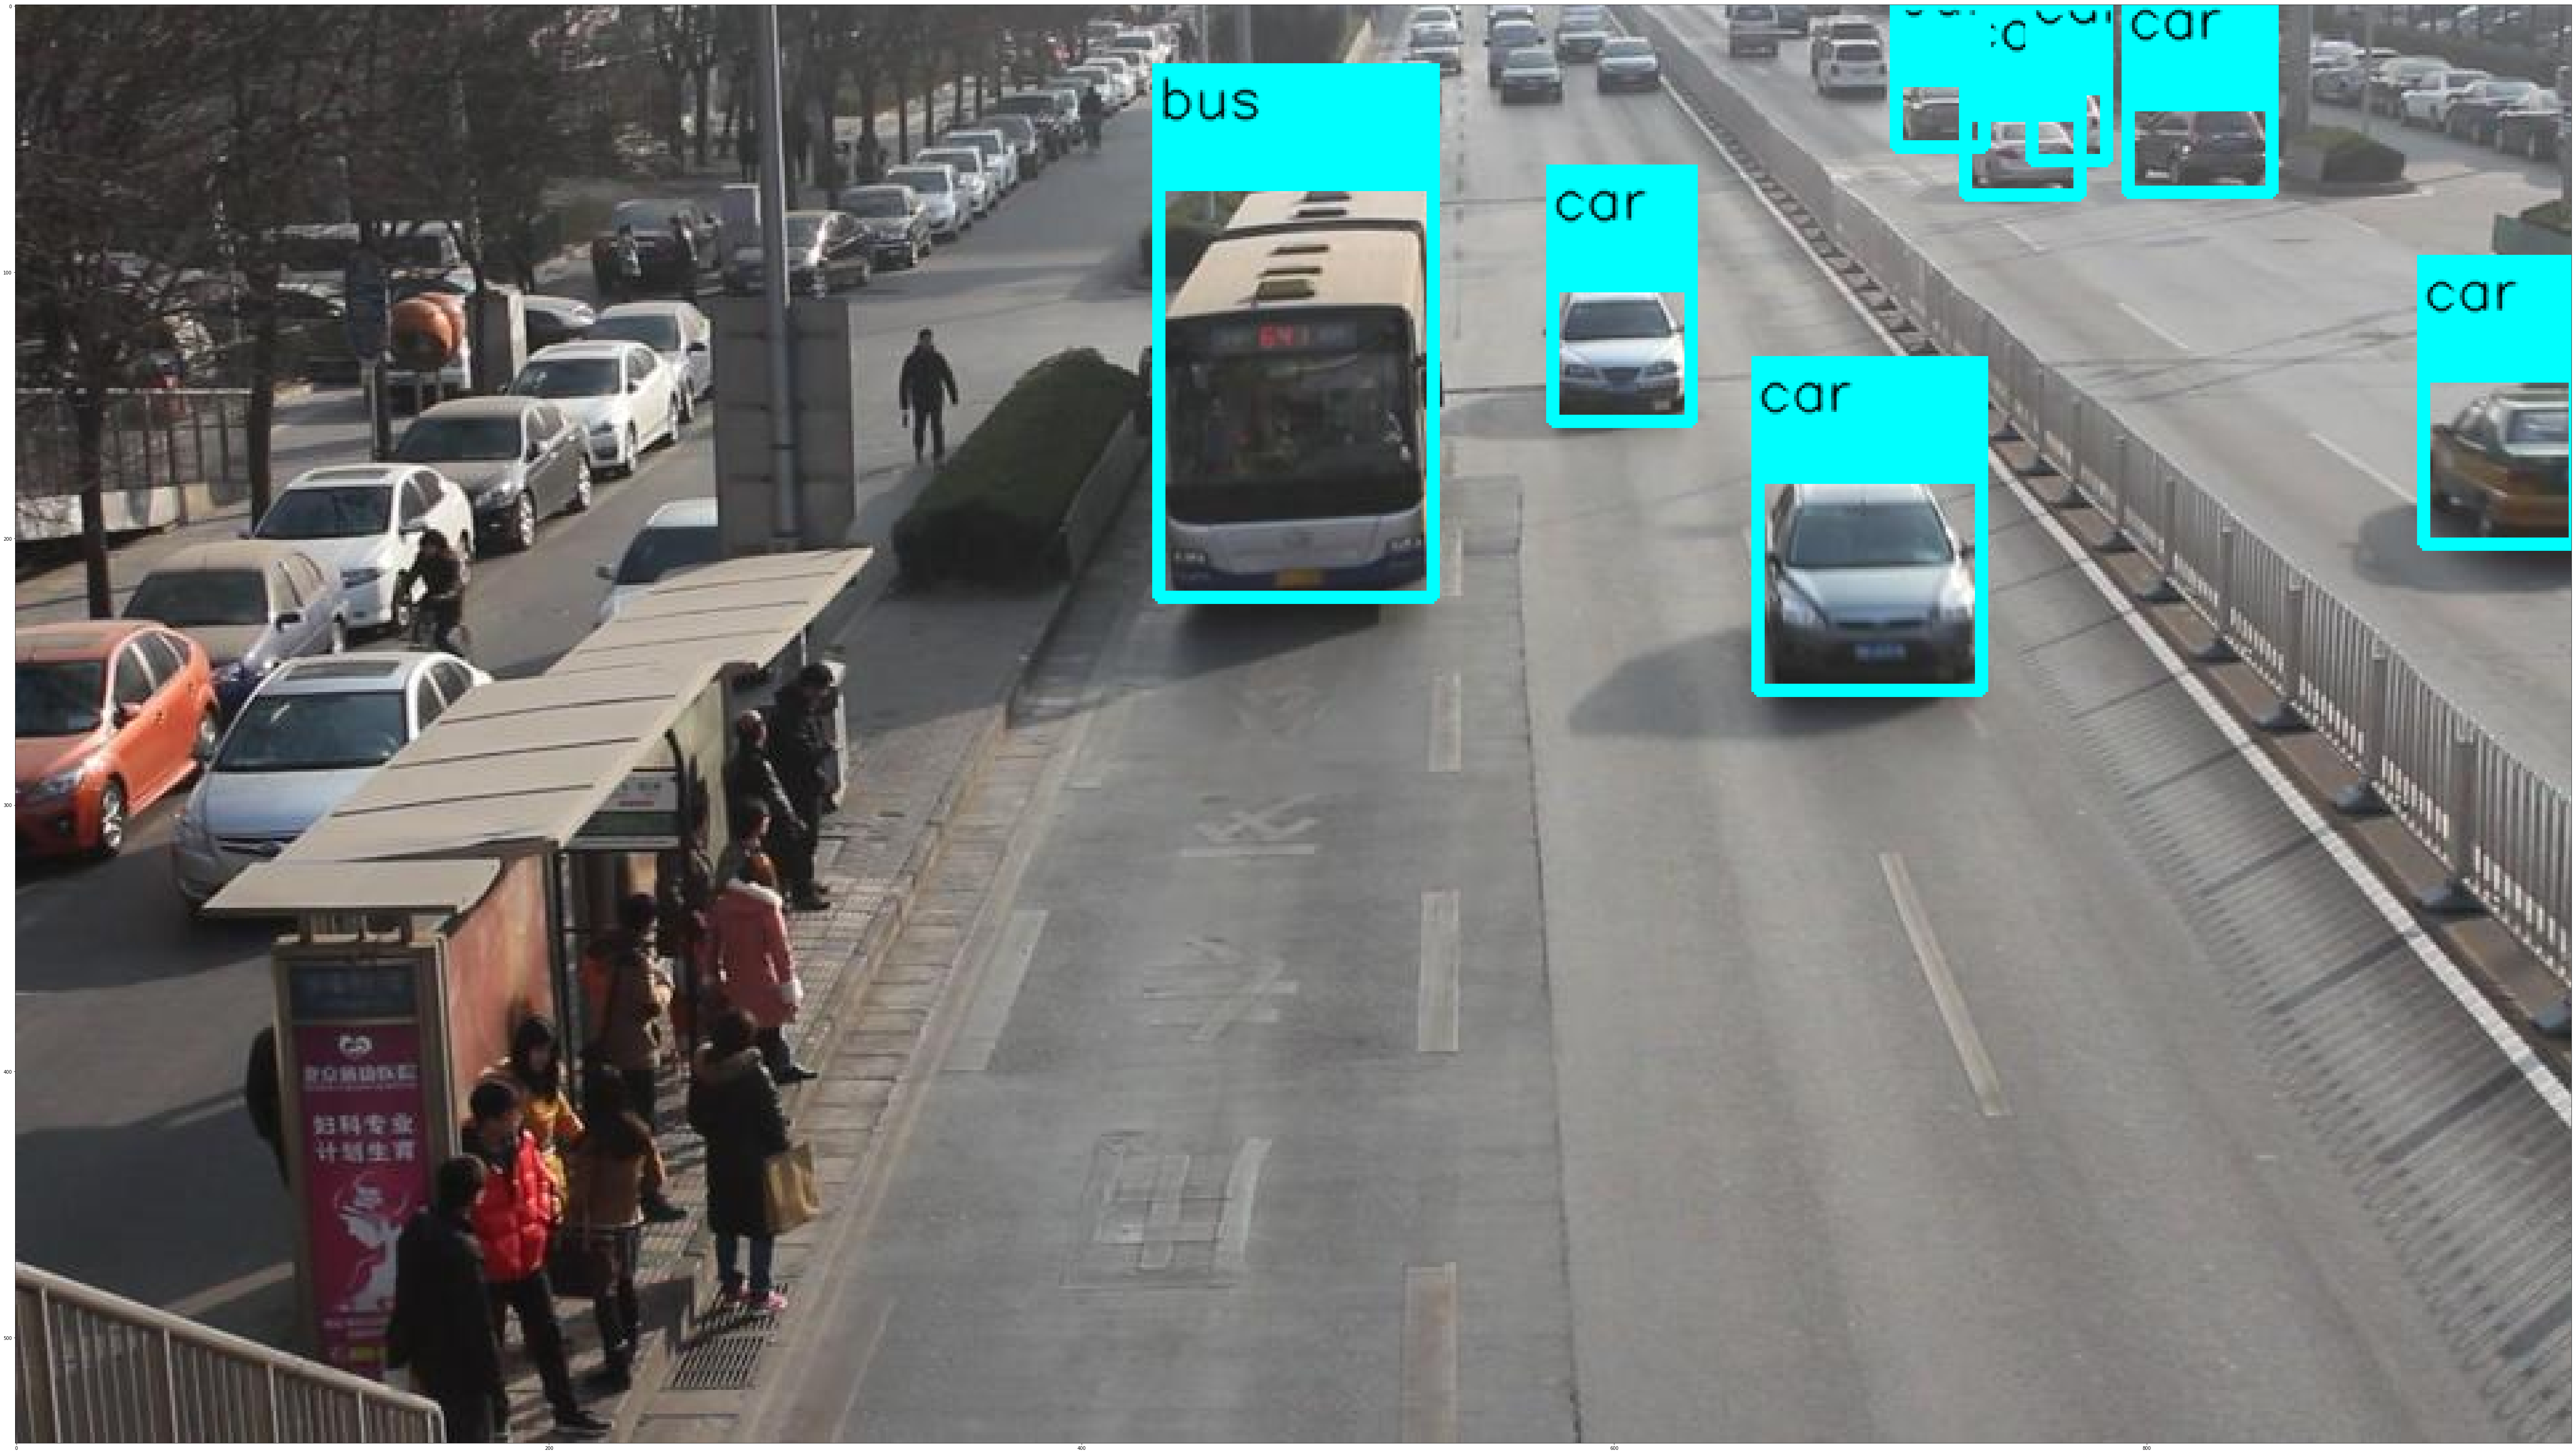

In [75]:
import numpy as np
hue = np.copy(test_1)
for key in huex:
    for box in huex[key]:
        hue = draw_box_label(hue, box, key, box_color=(0, 255, 255),show_label=True)
plt.figure(figsize=(100,100))
plt.imshow(hue)
plt.show()

In [77]:
import numpy as np
from lib.detector.YOLO.train.preprocessing import parse_annotation
train_imgs, train_labels = parse_annotation('./data/voc/anot/',
                                                './data/voc/image/',
                                                [])
train_valid_split = int(0.8*len(train_imgs))
np.random.shuffle(train_imgs)

valid_imgs = train_imgs[train_valid_split:]
train_imgs = train_imgs[:train_valid_split]

In [80]:
train_imgs[0]

{'object': [{'name': 'bicycle',
   'xmax': 421,
   'xmin': 39,
   'ymax': 353,
   'ymin': 116}],
 'filename': './data/voc/image/2011_003003.jpg',
 'height': 375,
 'width': 500}

In [93]:
train_imgs[16]

{'object': [{'name': 'chair',
   'xmax': 365,
   'xmin': 282,
   'ymax': 348,
   'ymin': 236},
  {'name': 'bicycle', 'xmax': 252, 'xmin': 60, 'ymax': 356, 'ymin': 188}],
 'filename': './data/voc/image/2010_003115.jpg',
 'height': 375,
 'width': 500}

In [87]:
test_2 = cv2.imread(train_imgs[16]['filename'])
test_2 = cv2.cvtColor(test_2, cv2.COLOR_BGR2RGB)

In [95]:
test_2.shape

(375, 500, 3)

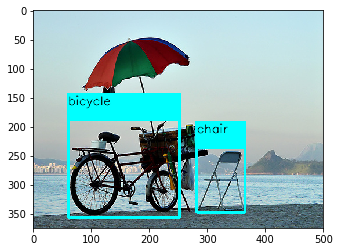

In [92]:
obj = train_imgs[16]['object'][1]
bbox = [obj['ymin'], obj['xmin'], obj['ymax'], obj['xmax']]
plt.imshow(draw_box_label(test_2, bbox, 'bicycle', box_color=(0, 255, 255),show_label=True))
plt.show()

In [113]:
import os
list_key = {}
randomized = []
img_list = []
xml_dir = './data/ua_deteract/DETRAC-Train-Annotations-XML/'
for xml_anot in os.listdir(xml_dir):
    tree = ET.parse(xml_dir +xml_anot)
    weather = tree.find('sequence_attribute').attrib['sence_weather']
    if weather not in randomized:
        print(weather)
        randomized.append(weather)
        test_1 = cv2.imread('./data/ua_deteract/Insight-MVT_Annotation_Train/' + xml_anot[:-4] + '/img00039.jpg')
        test_1 = cv2.cvtColor(test_1, cv2.COLOR_BGR2RGB)
        img_list.append(test_1)
    for elem in tree.findall('frame'):
        for target in list(elem.find('target_list')):
#             box = target.find('box')
            attribute = target.find('attribute')
            key = attribute.attrib['vehicle_type']
#             xmin = int(round(float(box.attrib['left'])))
#             ymin = int(round(float(box.attrib['top'])))
#             xmax = xmin + int(round(float(box.attrib['width'])))
#             ymax = ymin + int(round(float(box.attrib['height'])))
            if key not in list_key:
                list_key[key] = 1
            else:
                list_key[key] += 1

sunny
night
cloudy
rainy


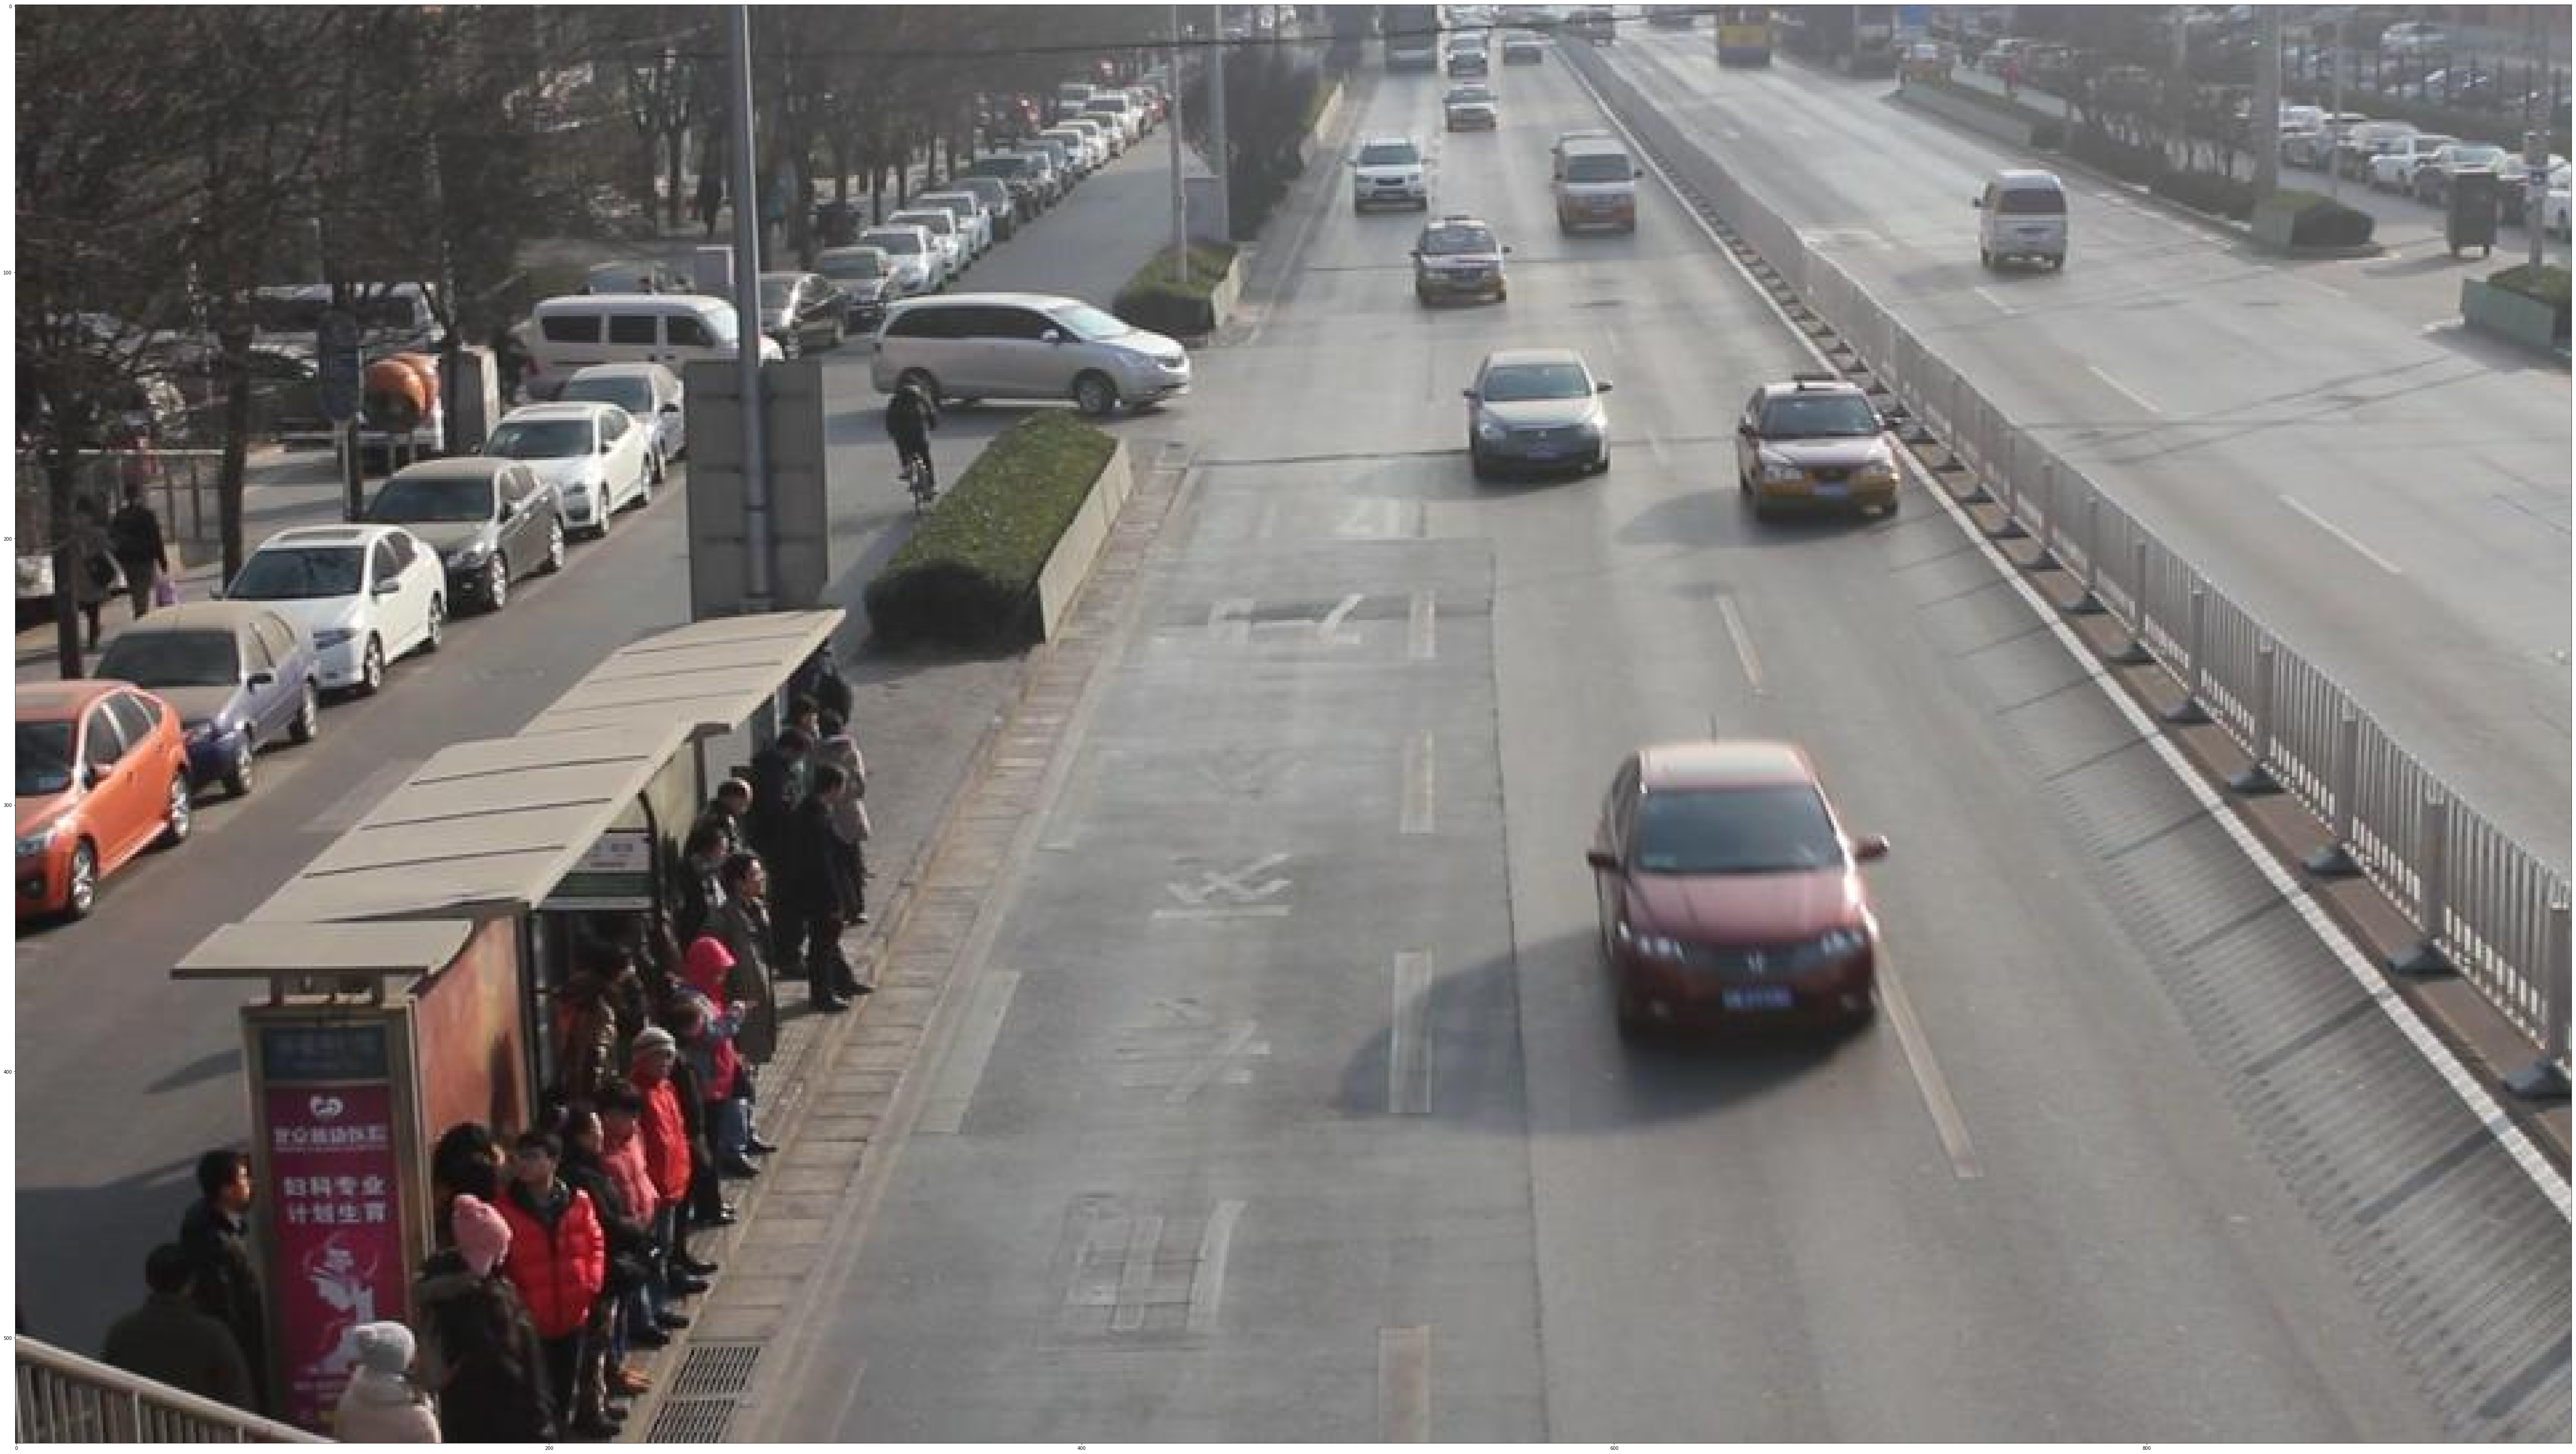

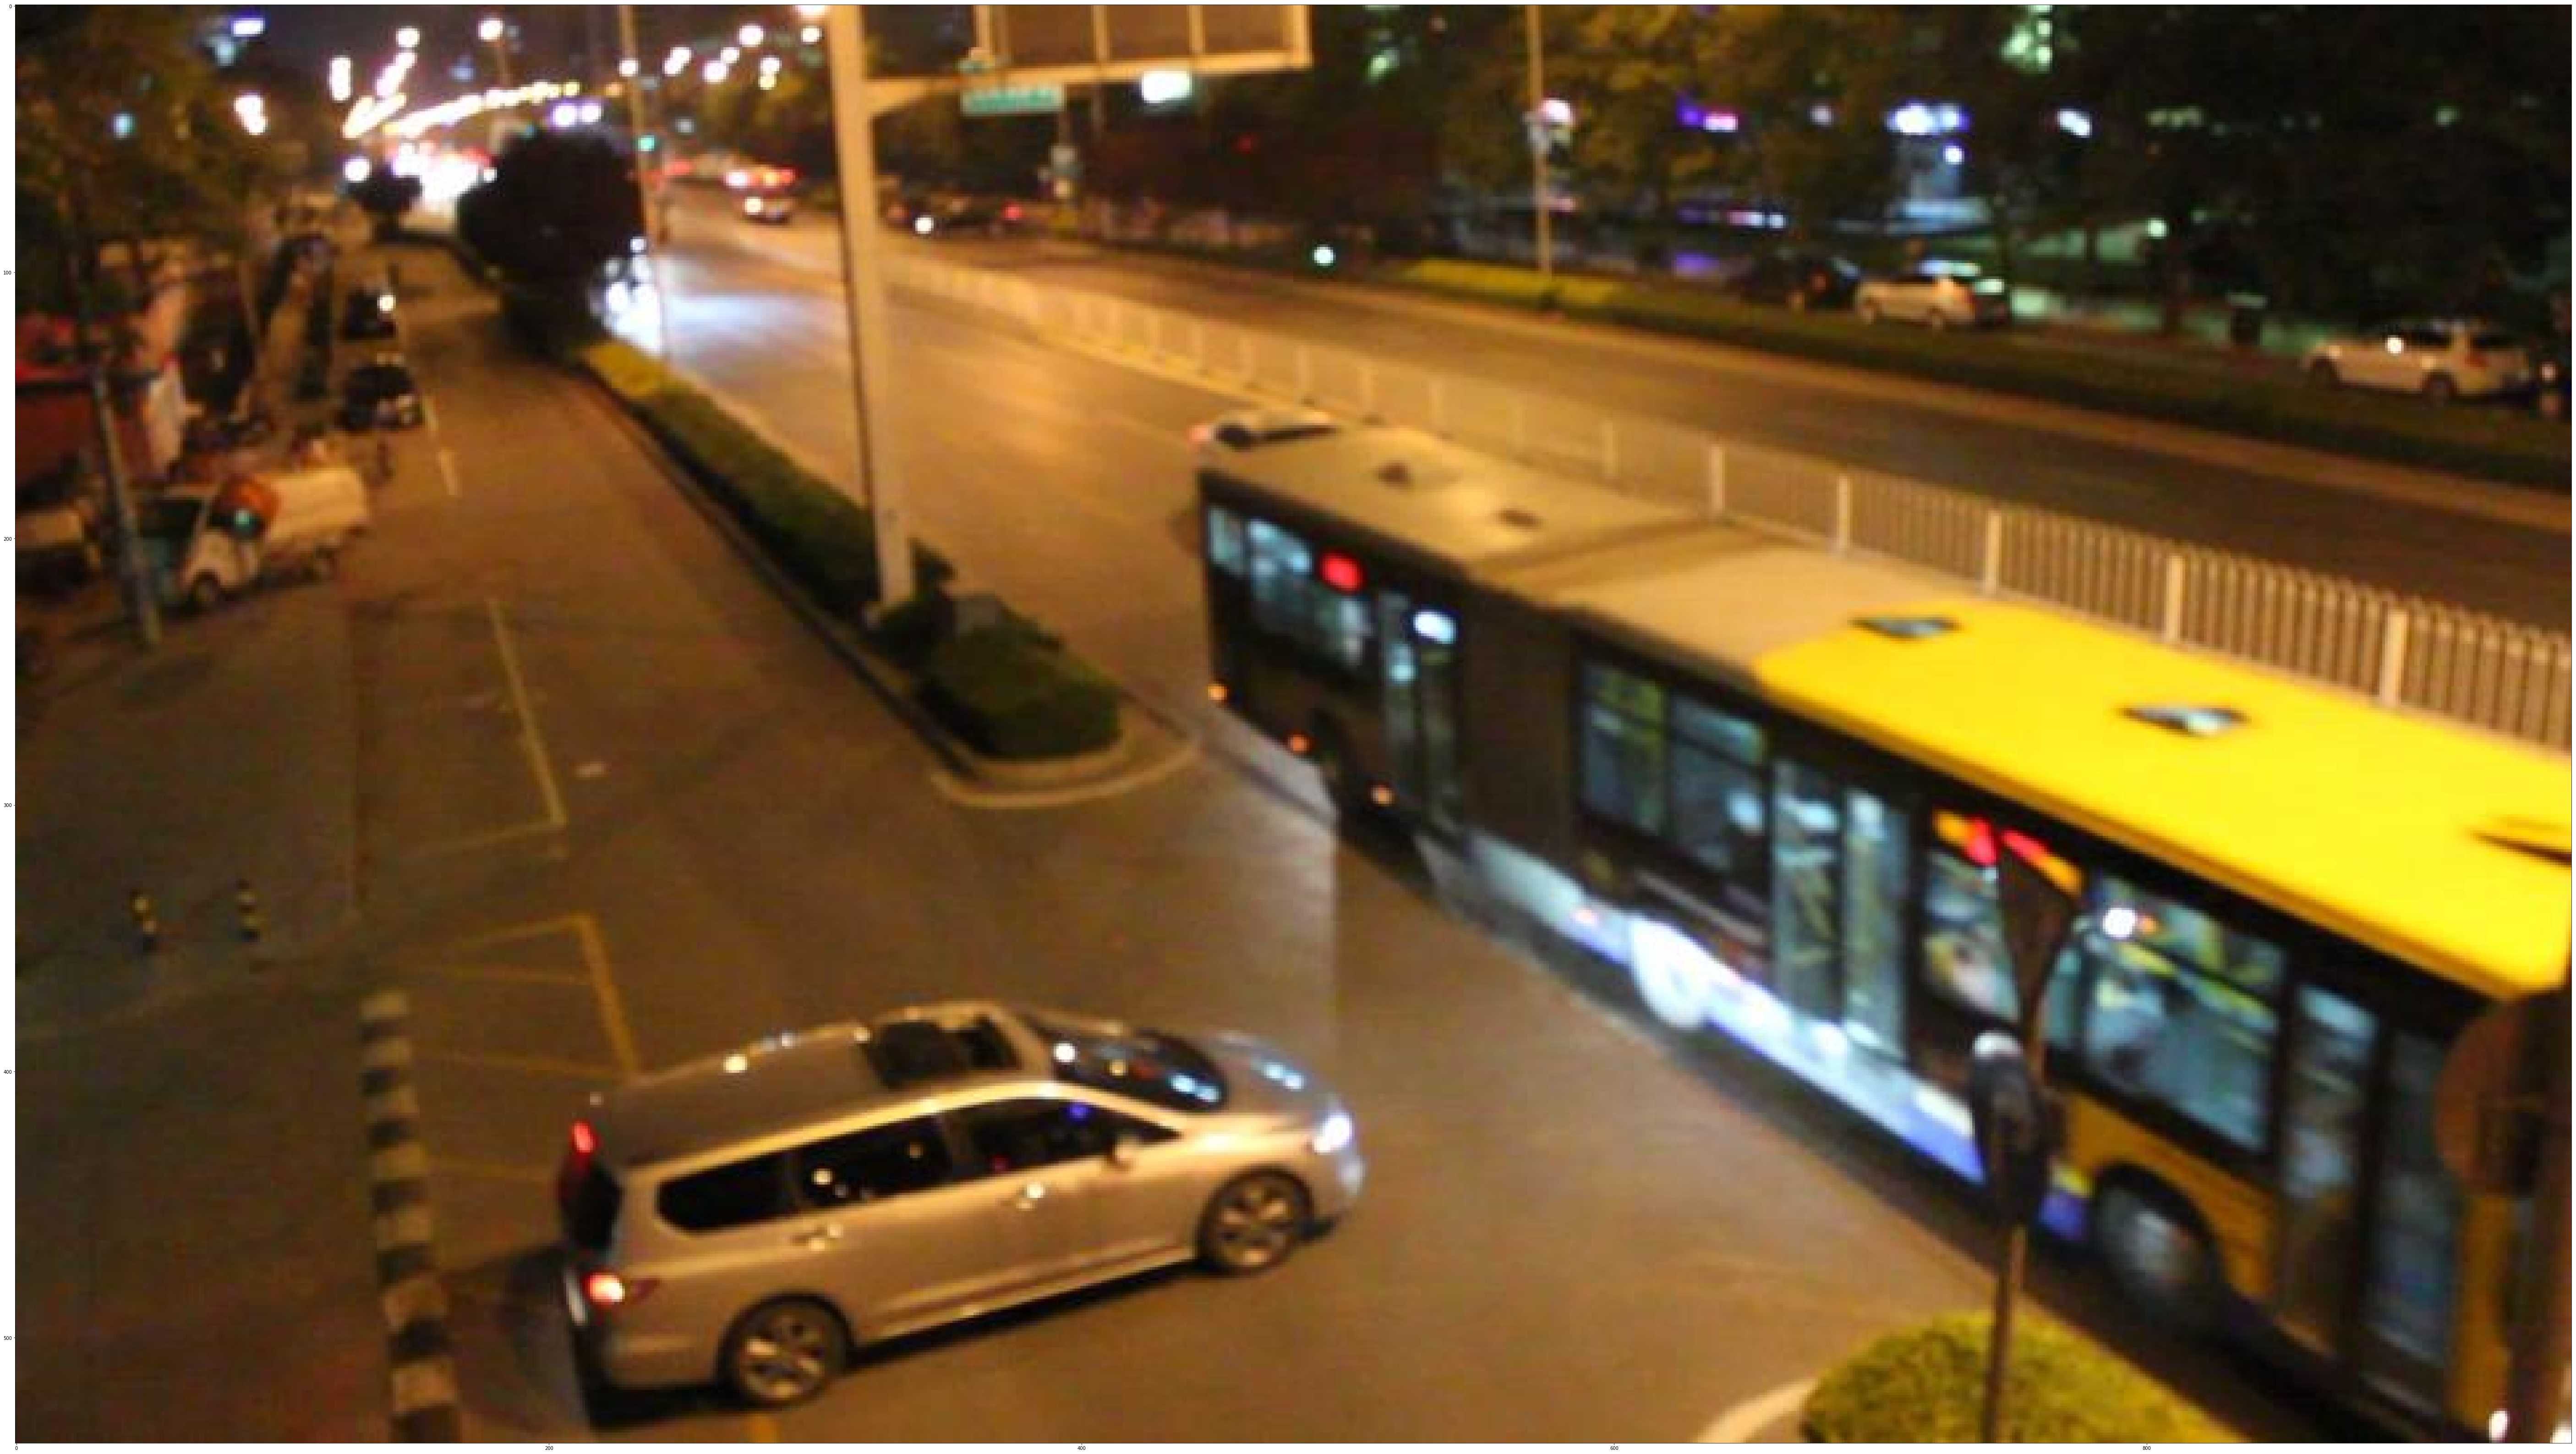

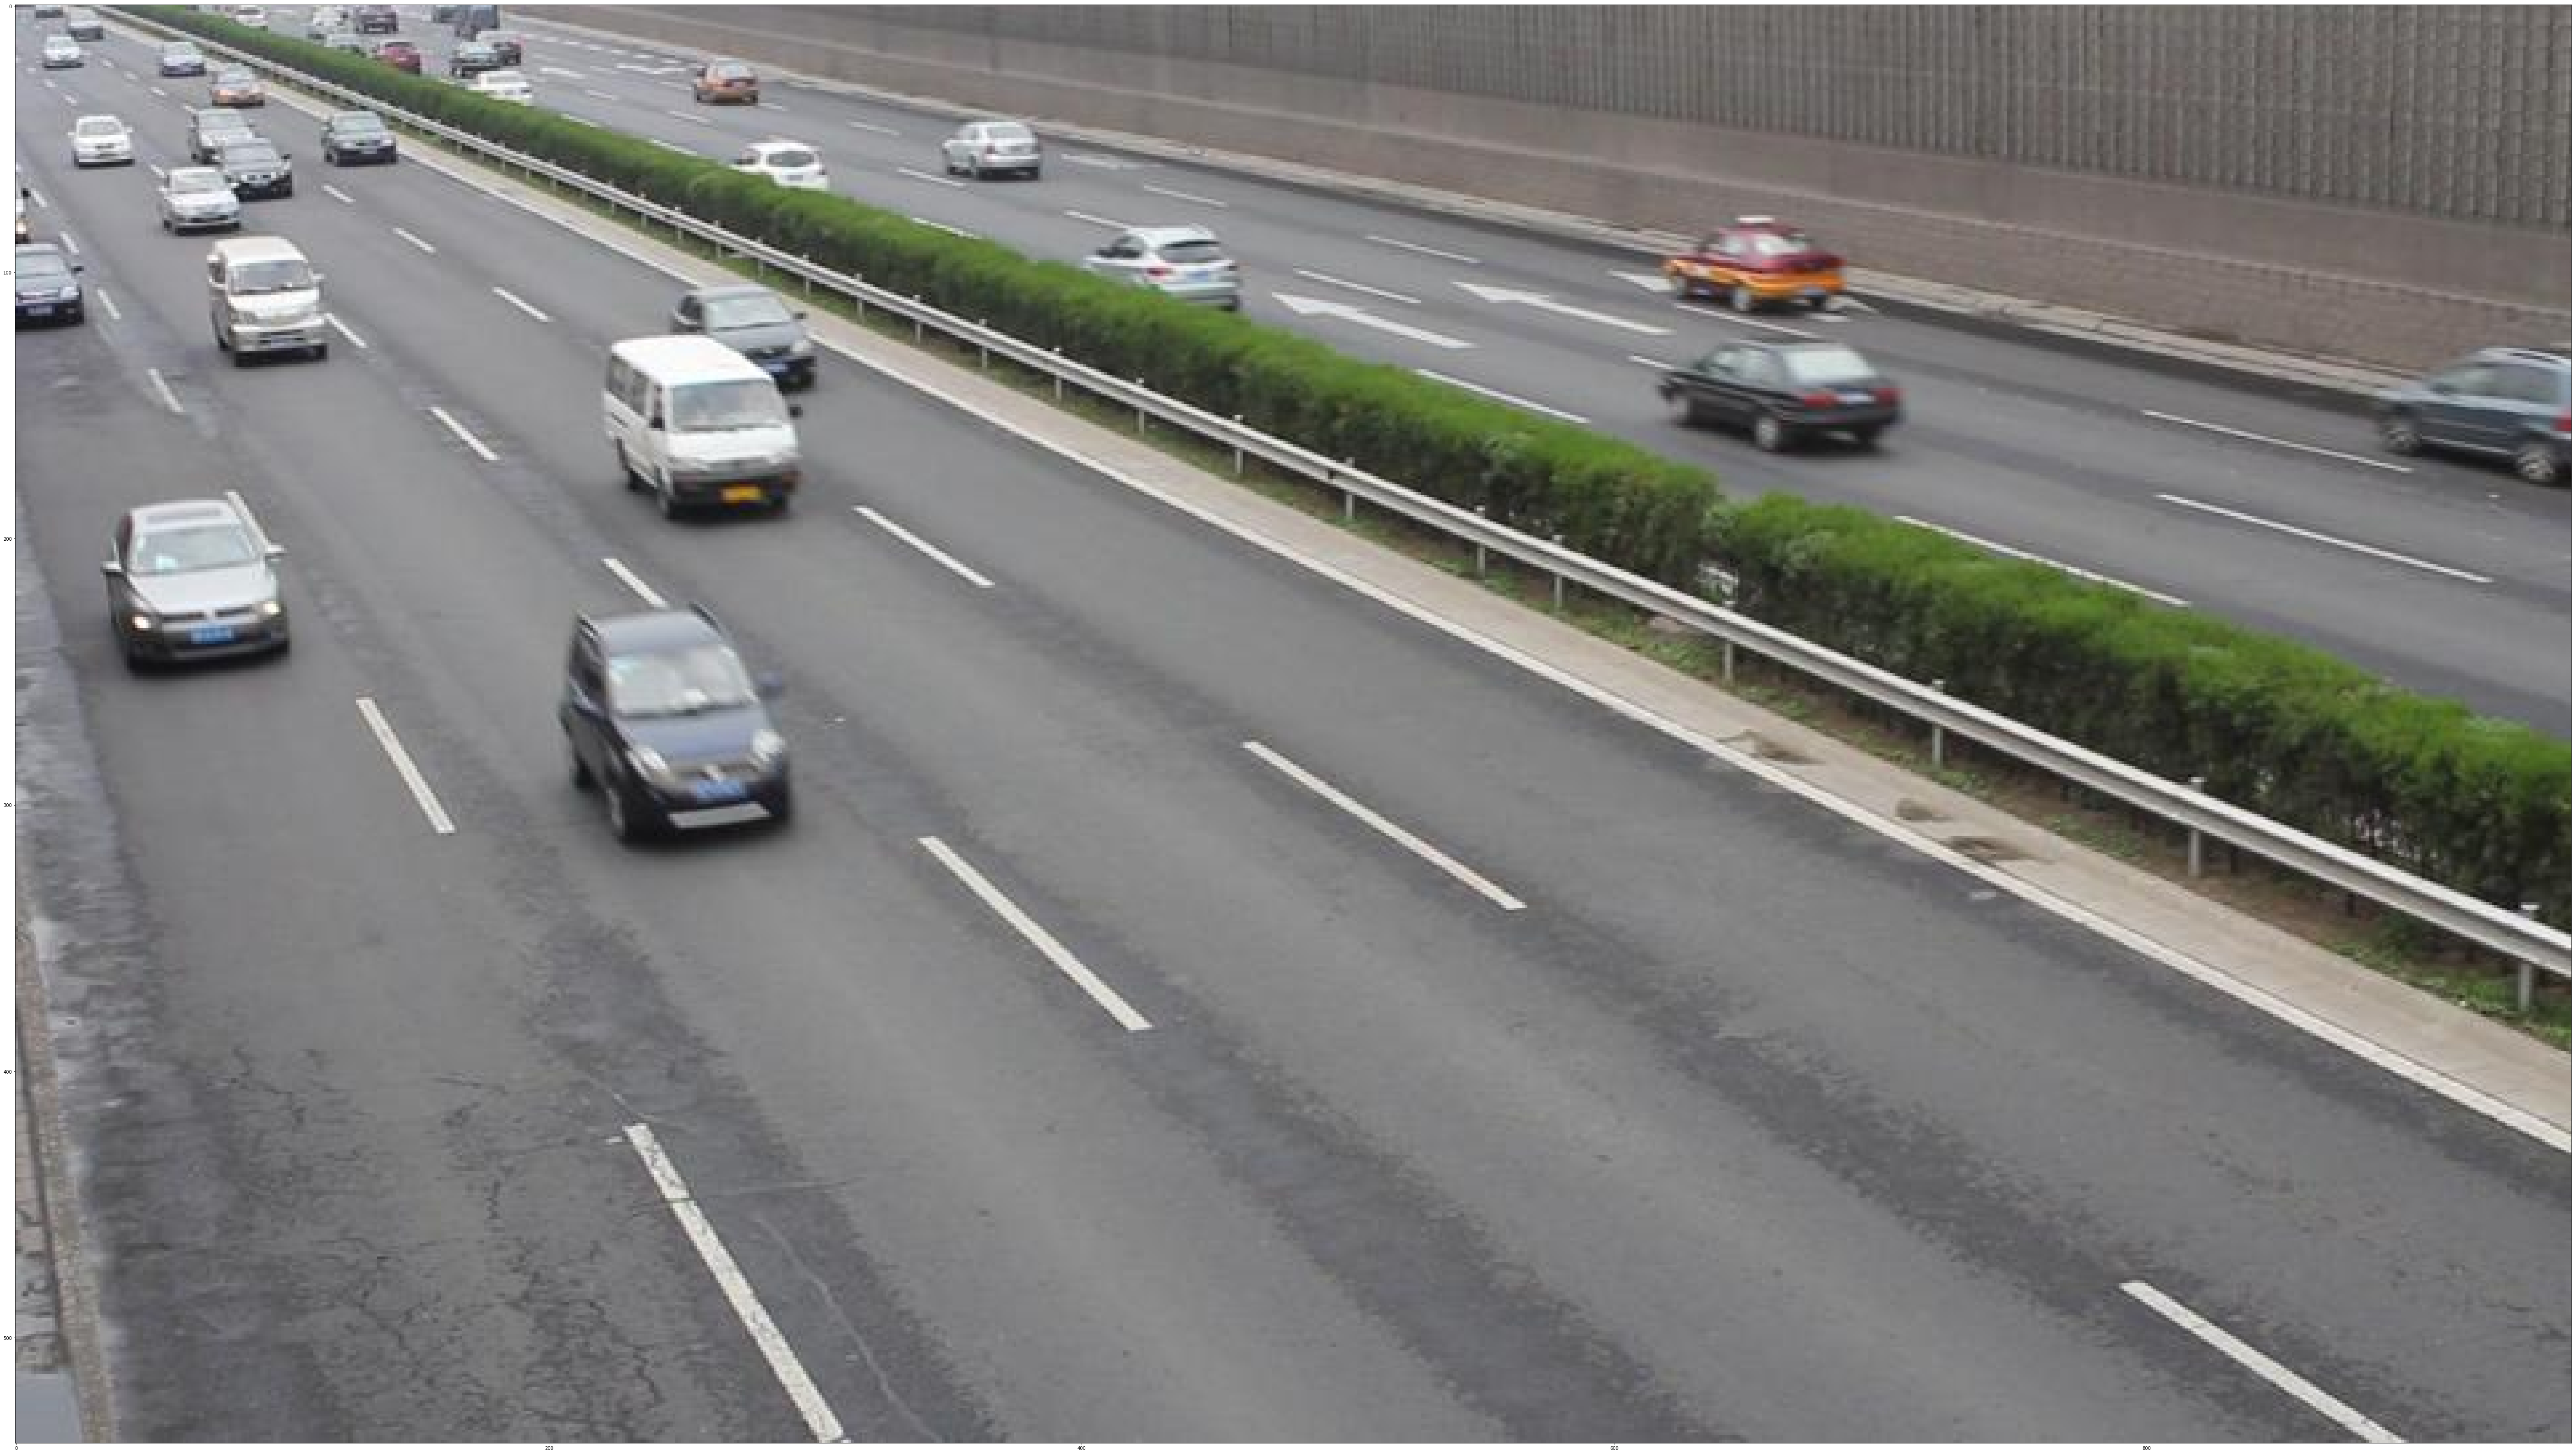

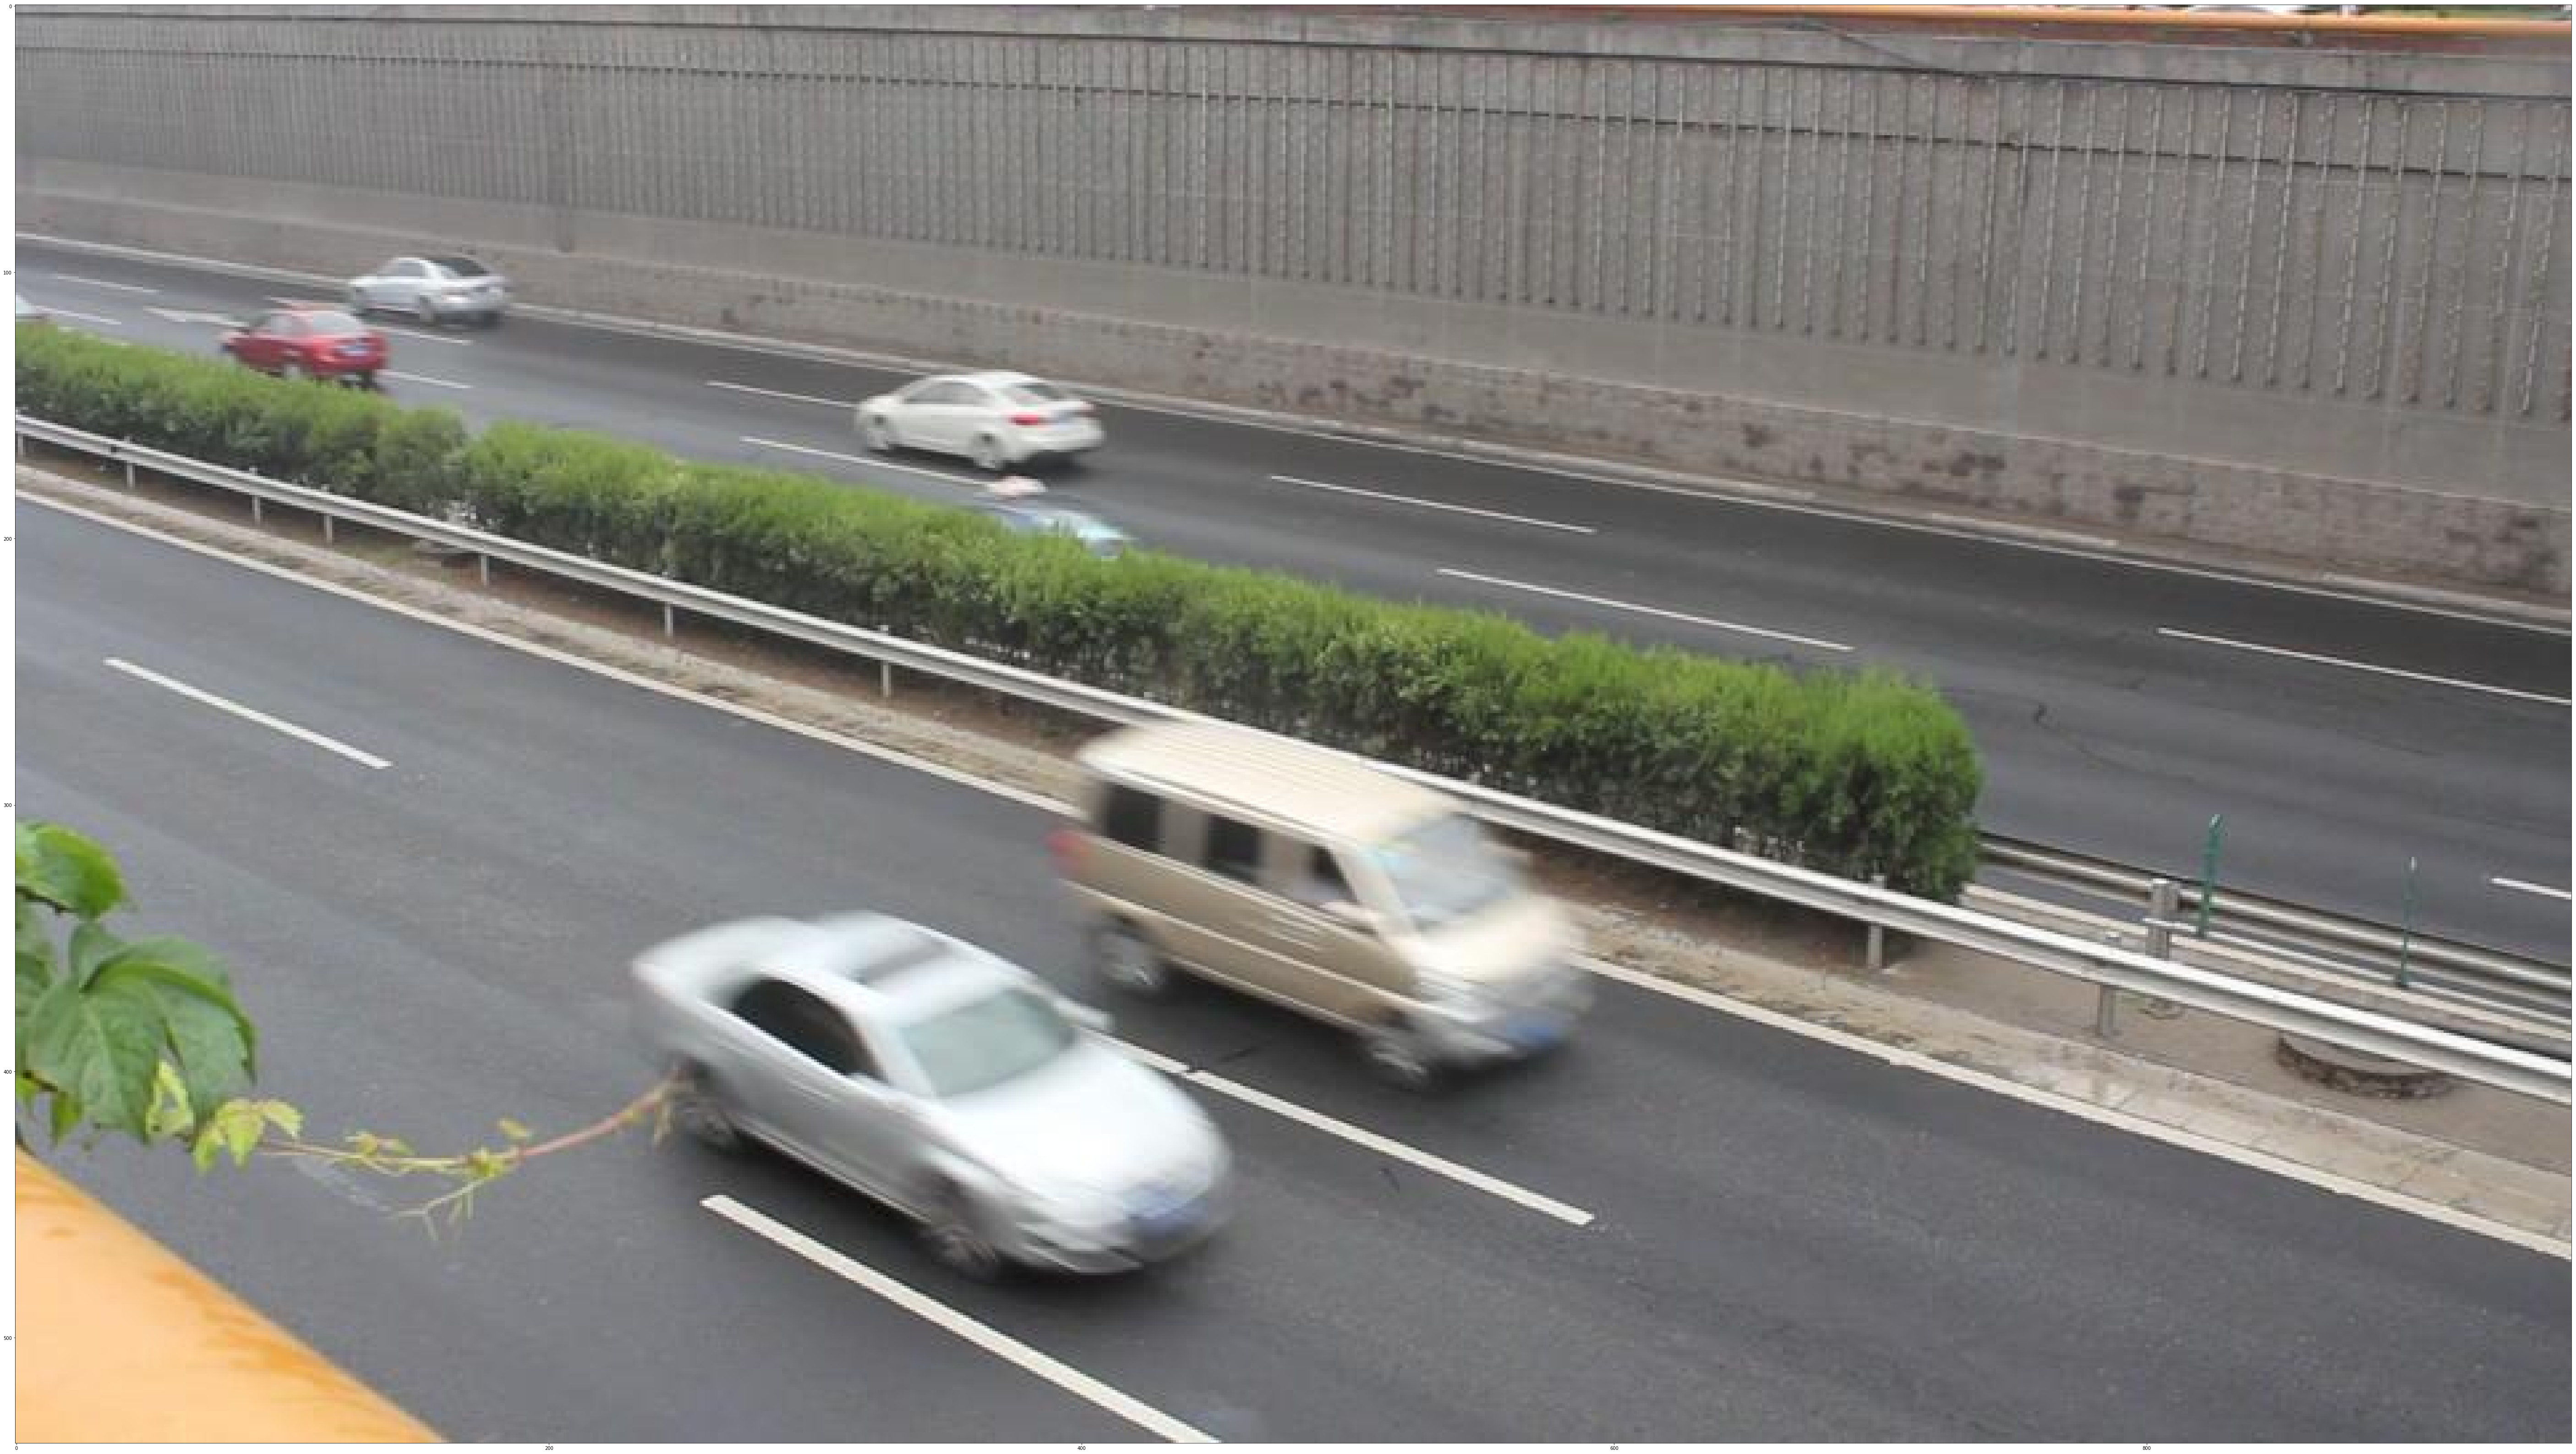

In [114]:
for _img in img_list:
    plt.figure(figsize=(100,100))
    plt.imshow(_img)
    plt.show()

In [101]:
list_key

{'car': 503853, 'van': 57051, 'others': 3726, 'bus': 33651}

In [116]:
print(train_labels['car'])

2492


In [117]:
print(train_labels['bus'])

685


In [118]:
print(train_labels['motorbike'])

801


In [120]:
print(train_labels['bicycle'])

837
